# SPAM FILTERING USING NLP

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
messages=pd.read_csv("G:/DATA/Python/spam.csv",encoding="cp1252")

In [48]:
messages.head()

,labels,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [4]:
messages.shape

(6776, 5)

In [5]:
# removing the garbage columns which have automically generated
messages=messages.iloc[:,[0,1]]
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# v1 is the target variable(for prediction) and v2 is the x variable

messages.rename(columns={"v1":"labels","v2":"message"},inplace=True)

In [7]:
# now we make the target variable into 1 and 0

messages.labels.replace({"ham":0,"spam":1},inplace=True)

In [8]:
messages.head()

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# how to make a work cloud
# Strict note: we should ensure that our words are uniformly case sensitive i.e( either all capital or all small)

In [10]:
#now we convert everything into lower case

messages.message=messages.message.str.lower()

In [11]:
messages.head()

,labels,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [12]:
from nltk.corpus import stopwords

In [13]:
#we can see the list of stopwords in english

stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
import wordcloud
from wordcloud import WordCloud

In [16]:
cloud=WordCloud(max_words=20,stopwords=stopwords.words("english")).generate(str(messages["message"]))

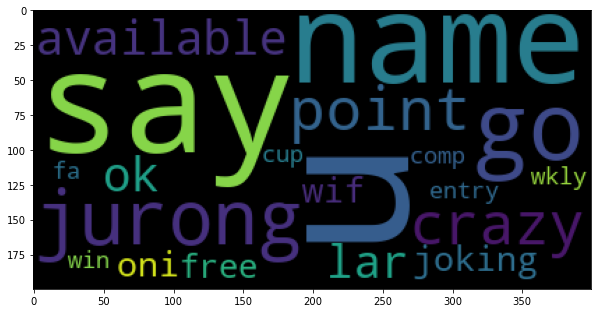

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [18]:
# creating wordclouds for spam and ham mails seperately

In [19]:
cloudham=WordCloud(max_words=20,stopwords=stopwords.words("english")).generate(str(messages.message[messages.labels==0]))

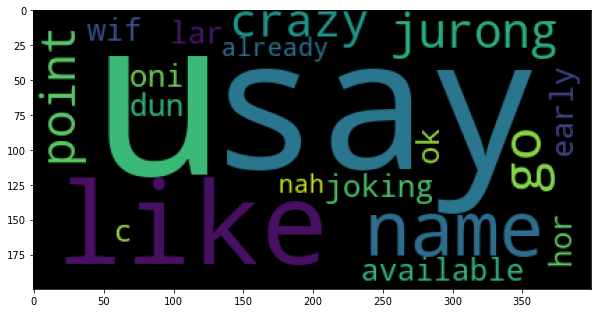

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(cloudham)

In [21]:
cloudspam=WordCloud(max_words=20,stopwords=stopwords.words("english")).generate(str(messages.message[messages.labels==1]))

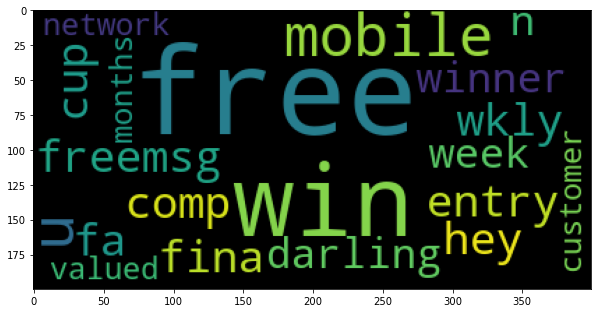

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(cloudspam)

In [23]:
import string

In [24]:
# we need to remove if any punctuations present before building TDM
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# this is a user defined function to clean the messages (by removing punctuations and stopwords)

In [26]:
def text_process(mess):
    """
    1. remove the punctuation
    2. remove the stopwords
    3.return the list of clean textwords
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return[word for word in nopunc.split() if word not in stopwords.words("english")]

In [27]:
messages["message"].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

In [28]:
# count vectorizer returns the counts of words 
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer= CountVectorizer(analyzer=text_process).fit(messages["message"])

In [29]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [30]:
# this means that there are 9422 different words , which means my TDM will have 9422 columns
len(bow_transformer.vocabulary_)

9422

In [31]:
# code to create TDM

messages_bow   =    bow_transformer.transform(messages.message)

In [32]:
# here we can see that we have got our TDM
messages_bow.shape

(6776, 9422)

In [34]:
# creating train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(messages_bow, messages.labels ,test_size=.2)

# Decisiontree

In [35]:
# model making

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [36]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
pred_dt=dt.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix,roc_auc_score

In [39]:
tab_dt=confusion_matrix(pred_dt,y_test)
tab_dt

array([[1157,   26],
       [  12,  161]], dtype=int64)

In [49]:
# accuracy
accuracy_dt= tab_dt.diagonal().sum()/tab_dt.sum() * 100
accuracy_dt

97.1976401179941

In [54]:
# ROC score
roc_dt=roc_auc_score(pred_dt,y_test)
roc_dt

0.9543289080861335

# RandomForest

In [50]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [41]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
pred_ran=rf.predict(x_test)

In [43]:
tab_ran= confusion_matrix(pred_ran,y_test)
tab_ran

array([[1168,   33],
       [   1,  154]], dtype=int64)

In [51]:
# accuracy
accuracy_ran= tab_ran.diagonal().sum()/tab_ran.sum() * 100
accuracy_ran

97.49262536873157

In [55]:
# ROC score
roc_ran=roc_auc_score(pred_ran,y_test)
roc_ran

0.9830356423410598

# Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [45]:
nb.fit(x_train,y_train)

MultinomialNB()

In [46]:
pred_nb= nb.predict(x_test)

In [47]:
tab_nb=confusion_matrix(pred_nb,y_test)
tab_nb

array([[1153,    8],
       [  16,  179]], dtype=int64)

In [52]:
# accuracy
accuracy_nb= tab_nb.diagonal().sum()/tab_nb.sum() * 100
accuracy_nb

98.23008849557522

In [56]:
# ROC score
roc_nb=roc_auc_score(pred_nb,y_test)
roc_nb

0.9555290532034718